In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from astropy.cosmology import FlatLambdaCDM

# Read the CSV file, skipping comment lines and setting proper column names
column_names = ['SN', 'CID', 'IDSURVEY', 'zHD', 'zHEL', 'MU', 'MUERR', 'MUERR_VPEC', 'MUERR_SYS', 'PROBIA_BEAMS']
hd = pd.read_csv("DATA/DES-Dovekie_HD.csv", sep=r'\s+', skiprows=9, names=column_names)
print(hd.columns)
print(hd.head())

Index(['SN', 'CID', 'IDSURVEY', 'zHD', 'zHEL', 'MU', 'MUERR', 'MUERR_VPEC',
       'MUERR_SYS', 'PROBIA_BEAMS'],
      dtype='str')
    SN        CID  IDSURVEY      zHD     zHEL        MU   MUERR  MUERR_VPEC  \
0  SN:  Gaia16agf       150  0.02509  0.02507  35.25995  0.1773      0.0731   
1  SN:     2003it        63  0.02510  0.02528  35.08017  0.1641      0.0730   
2  SN:     2007cq        64  0.02510  0.02604  34.98002  0.1331      0.0730   
3  SN:  AT2017cfc       150  0.02512  0.02403  35.13565  0.1211      0.0730   
4  SN:     2007sw        65  0.02517  0.02428  35.21658  0.1559      0.0728   

   MUERR_SYS  PROBIA_BEAMS  
0    0.05631           1.0  
1    0.04157           1.0  
2    0.03455           1.0  
3    0.03976           1.0  
4    0.04029           1.0  


In [ ]:
# Keep only real SNe used for cosmology
if "ISDAT_REAL" in hd.columns:
    hd = hd[hd["ISDATA_REAL"] == 1]

# Require physical CMB-frame redshift
hd = hd[hd["zHD"] > 0]
# Remove rows with missing values in key columns
needed = ["zHD", "MU", "MUERR", "MUERR_SYS"]
hd = hd.dropna(subset=needed)



In [11]:
hd["MUERR_TOT"] = np.sqrt(
    hd["MUERR"]**2 + hd["MUERR_SYS"]**2
)

In [12]:
cosmo = hd[
    ["CID", "zHD", "MU", "MUERR_TOT"]
].rename(columns={"zHD": "z"})

cosmo = cosmo.sort_values("z").reset_index(drop=True)

In [13]:
print("Number of SNe:", len(cosmo))
print("Mean redshift:", cosmo["z"].mean())
print("Redshift range:", cosmo["z"].min(), cosmo["z"].max())

print(cosmo.head())

Number of SNe: 1820
Mean redshift: 0.4674815769230769
Redshift range: 0.02509 1.14418
         CID        z        MU  MUERR_TOT
0  Gaia16agf  0.02509  35.25995   0.186027
1     2003it  0.02510  35.08017   0.169283
2     2007cq  0.02510  34.98002   0.137511
3  AT2017cfc  0.02512  35.13565   0.127460
4     2007sw  0.02517  35.21658   0.161022


In [14]:
def lowz_subset(df, zmax):
    sub = df[df["z"] < zmax]
    return sub, sub["z"].mean()

for zmax in [0.03, 0.035, 0.04]:
    sub, zbar = lowz_subset(cosmo, zmax)
    print(f"z < {zmax:.3f}: N={len(sub)}, <z>={zbar:.4f}")

z < 0.030: N=40, <z>=0.0275
z < 0.035: N=80, <z>=0.0300
z < 0.040: N=105, <z>=0.0317


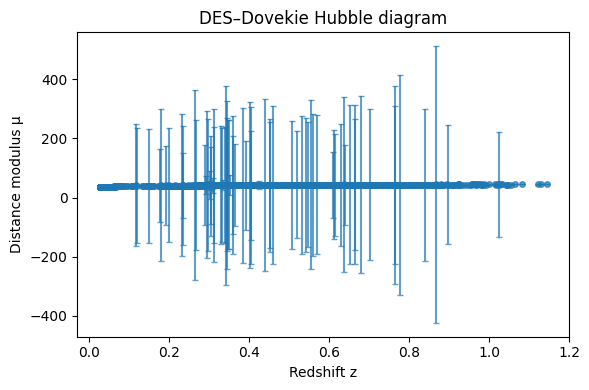

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.errorbar(
    cosmo["z"],
    cosmo["MU"],
    yerr=cosmo["MUERR_TOT"],
    fmt="o",
    ms=4,
    alpha=0.7,
    capsize=2
)

plt.xlabel("Redshift z")
plt.ylabel("Distance modulus μ")
plt.title("DES–Dovekie Hubble diagram")

plt.tight_layout()
plt.show()


In [16]:
results = [
    {"z_eff": 0.025, "Omega_m": 0.31, "err": 0.03, "label": "DES full"},
    {"z_eff": 0.020, "Omega_m": 0.29, "err": 0.05, "label": "DES low-z"},
]


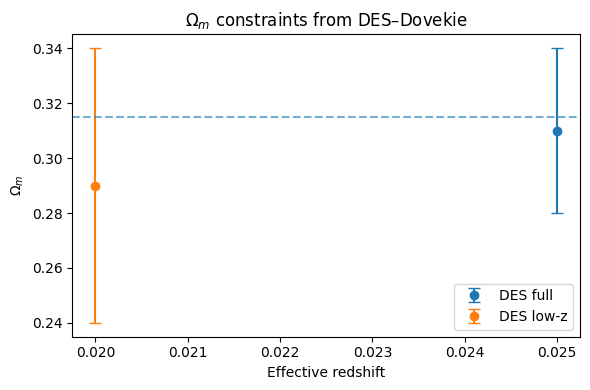

In [17]:
plt.figure(figsize=(6, 4))

for r in results:
    plt.errorbar(
        r["z_eff"],
        r["Omega_m"],
        yerr=r["err"],
        fmt="o",
        capsize=4,
        label=r["label"]
    )

# Reference line (Planck-like)
plt.axhline(0.315, linestyle="--", alpha=0.6)

plt.xlabel("Effective redshift")
plt.ylabel(r"$\Omega_m$")
plt.title(r"$\Omega_m$ constraints from DES–Dovekie")

plt.legend()
plt.tight_layout()
plt.show()


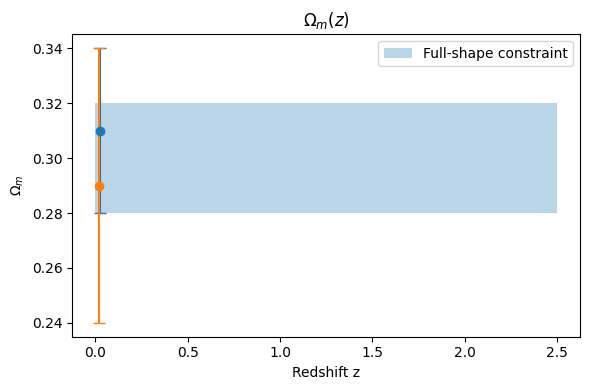

In [18]:
import numpy as np

z_grid = np.linspace(0.0, 2.5, 200)

Omega_mean = 0.30
Omega_err = 0.02

plt.figure(figsize=(6, 4))

plt.fill_between(
    z_grid,
    Omega_mean - Omega_err,
    Omega_mean + Omega_err,
    alpha=0.3,
    label="Full-shape constraint"
)

for r in results:
    plt.errorbar(
        r["z_eff"],
        r["Omega_m"],
        yerr=r["err"],
        fmt="o",
        capsize=4
    )

plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega_m$")
plt.title(r"$\Omega_m(z)$")

plt.legend()
plt.tight_layout()
plt.show()
